### Predict Diabetes using XGBoost local mode

In [1]:
# install xgboost in notebook instance
! pip install xgboost

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
column_list_file = 'diabetes_training_column_list.txt'
train_file = 'diabetes_train_imputed.csv'
validation_file = 'diabetes_validation_imputed.csv'

In [9]:
# Restore columns 
columns=[]
with open(column_list_file,'r') as f:
    columns = f.read().split(',')
    
columns

['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']

In [10]:
# read train and validation into dataframe

df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [11]:
df_train.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,6.0,92.0,62.0,32.0,126.0,32.0,0.085,46
1,0,5.0,132.0,80.0,27.0,130.0,26.8,0.186,69
2,0,3.0,106.0,72.0,27.0,130.0,25.8,0.207,27
3,0,4.0,99.0,68.0,38.0,130.0,32.8,0.145,33
4,0,4.0,96.0,56.0,17.0,49.0,20.8,0.340,26


In [12]:
df_validation.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1.0,130.0,70.0,13.0,105.0,25.9,0.472,22
1,1,8.0,133.0,72.0,33.0,207.0,32.9,0.270,39
2,0,4.0,137.0,68.0,14.0,148.0,24.8,0.143,21
3,0,2.0,88.0,74.0,19.0,53.0,29.0,0.229,22
4,1,9.0,130.0,70.0,33.0,207.0,34.2,0.652,45


In [13]:
# splitting X and y from datasets

X_train = df_train.iloc[:, 1:] # Features from 1st column
y_train = df_train.iloc[:, 0].ravel() # first column label as list

X_validation = df_validation.iloc[:, 1:]
y_validation = df_validation.iloc[:, 0].ravel()

In [14]:
# Launch a classifier

classifier = xgb.XGBClassifier(objective = "binary:logistic")

In [15]:
classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)],
            eval_metric=['logloss'],
            early_stopping_rounds=10)

[0]	validation_0-logloss:0.47065	validation_1-logloss:0.50751
[1]	validation_0-logloss:0.37063	validation_1-logloss:0.43372
[2]	validation_0-logloss:0.29789	validation_1-logloss:0.38943
[3]	validation_0-logloss:0.25022	validation_1-logloss:0.36115
[4]	validation_0-logloss:0.20995	validation_1-logloss:0.33938
[5]	validation_0-logloss:0.18047	validation_1-logloss:0.31706
[6]	validation_0-logloss:0.15605	validation_1-logloss:0.30673
[7]	validation_0-logloss:0.13718	validation_1-logloss:0.30075
[8]	validation_0-logloss:0.12185	validation_1-logloss:0.29272
[9]	validation_0-logloss:0.11084	validation_1-logloss:0.29086
[10]	validation_0-logloss:0.10214	validation_1-logloss:0.28907
[11]	validation_0-logloss:0.09361	validation_1-logloss:0.29238
[12]	validation_0-logloss:0.08790	validation_1-logloss:0.29161
[13]	validation_0-logloss:0.08143	validation_1-logloss:0.28588
[14]	validation_0-logloss:0.07551	validation_1-logloss:0.28634
[15]	validation_0-logloss:0.07025	validation_1-logloss:0.28177
[1

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
classifier.set_params(eval_metric=['logloss'], early_stopping_rounds=10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [23]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-logloss:0.47065	validation_1-logloss:0.50751
[1]	validation_0-logloss:0.37063	validation_1-logloss:0.43372
[2]	validation_0-logloss:0.29789	validation_1-logloss:0.38943
[3]	validation_0-logloss:0.25022	validation_1-logloss:0.36115
[4]	validation_0-logloss:0.20995	validation_1-logloss:0.33938
[5]	validation_0-logloss:0.18047	validation_1-logloss:0.31706
[6]	validation_0-logloss:0.15605	validation_1-logloss:0.30673
[7]	validation_0-logloss:0.13718	validation_1-logloss:0.30075
[8]	validation_0-logloss:0.12185	validation_1-logloss:0.29272
[9]	validation_0-logloss:0.11084	validation_1-logloss:0.29086
[10]	validation_0-logloss:0.10214	validation_1-logloss:0.28907
[11]	validation_0-logloss:0.09361	validation_1-logloss:0.29238
[12]	validation_0-logloss:0.08790	validation_1-logloss:0.29161
[13]	validation_0-logloss:0.08143	validation_1-logloss:0.28588
[14]	validation_0-logloss:0.07551	validation_1-logloss:0.28634
[15]	validation_0-logloss:0.07025	validation_1-logloss:0.28177
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [24]:
classifier.evals_result()

{'validation_0': OrderedDict([('logloss',
               [0.47064801956244245,
                0.37062604769759117,
                0.2978859371479663,
                0.25022208764177906,
                0.20995141453416655,
                0.18046591873497492,
                0.15604774840522967,
                0.13717781180720534,
                0.12185480843473302,
                0.11083690565793985,
                0.10214054758974404,
                0.09360825665836228,
                0.08790108455202822,
                0.08142692856213123,
                0.0755095496978368,
                0.07024575431798229,
                0.06599833427024815,
                0.06192991274774935,
                0.05856730184973923,
                0.05516767345570042,
                0.0525361119675861,
                0.04985197145752852,
                0.04764746421396566,
                0.04538604761716637,
                0.04382388220512043,
                0.04265706236123019]

In [25]:
eval_result = classifier.evals_result()
training_rounds = len(eval_result['validation_0']['logloss'])

In [26]:
training_rounds

26

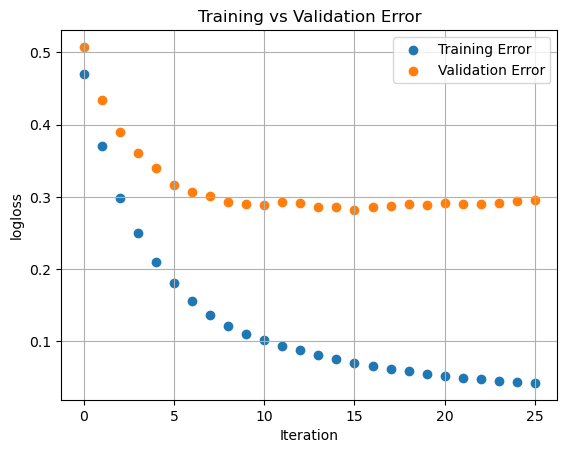

In [27]:
plt.scatter(x = range(training_rounds), y = eval_result['validation_0']['logloss'], label='Training Error')
plt.scatter(x = range(training_rounds), y = eval_result['validation_1']['logloss'], label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('logloss')
plt.title('Training vs Validation Error')
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

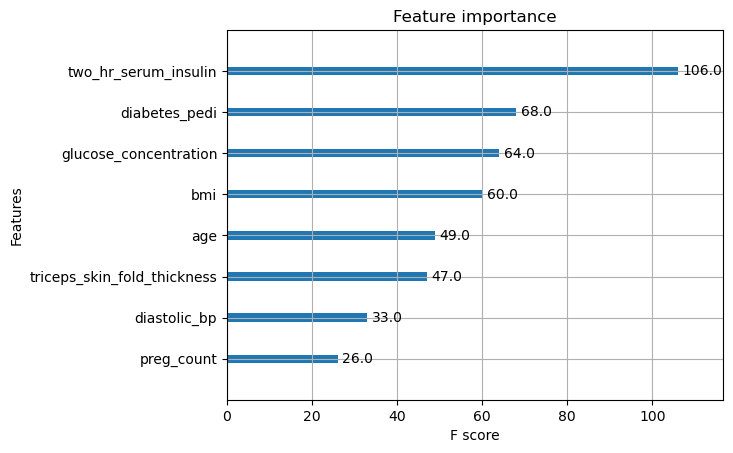

In [28]:
xgb.plot_importance(classifier)

In [29]:
df = pd.read_csv(validation_file, names=columns)

In [30]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1.0,130.0,70.0,13.0,105.0,25.9,0.472,22
1,1,8.0,133.0,72.0,33.0,207.0,32.9,0.270,39
2,0,4.0,137.0,68.0,14.0,148.0,24.8,0.143,21
3,0,2.0,88.0,74.0,19.0,53.0,29.0,0.229,22
4,1,9.0,130.0,70.0,33.0,207.0,34.2,0.652,45


In [31]:
X_test = df.iloc[:,1:]

In [32]:
result = classifier.predict(X_test)

In [33]:
result[:5]

array([0, 1, 0, 0, 1])

In [34]:
df['predicted_class']=result

In [35]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,predicted_class
0,0,1.0,130.0,70.0,13.0,105.0,25.9,0.472,22,0
1,1,8.0,133.0,72.0,33.0,207.0,32.9,0.270,39,1
2,0,4.0,137.0,68.0,14.0,148.0,24.8,0.143,21,0
3,0,2.0,88.0,74.0,19.0,53.0,29.0,0.229,22,0
4,1,9.0,130.0,70.0,33.0,207.0,34.2,0.652,45,1


### Binary Classifier Metrics

In [36]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [37]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [38]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['diabetes_class'], df['predicted_class'],labels=[1,0])

In [40]:
cnf_matrix

array([[ 64,  15],
       [ 12, 140]])

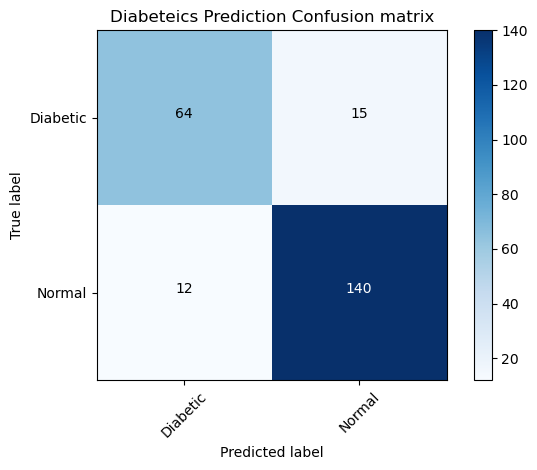

In [41]:
# Plotting confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],title='Diabeteics Prediction Confusion matrix')

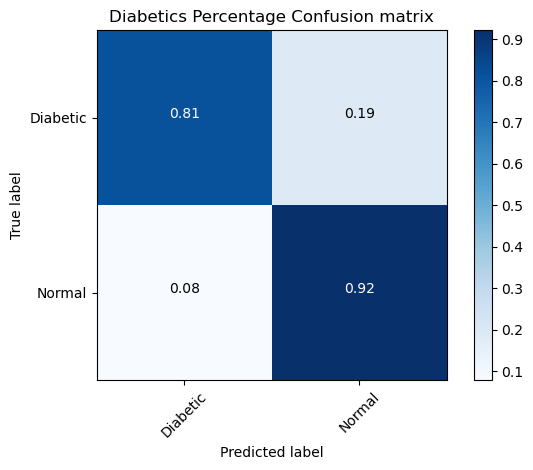

In [42]:
# Plotting Percentage confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],
                      title='Diabetics Percentage Confusion matrix',normalize=True)

In [43]:
metrics = [binary_classifier_metrics(df['diabetes_class'], df['predicted_class'])]
metrics

[{'TruePositive': 64,
  'TrueNegative': 140,
  'FalsePositive': 12,
  'FalseNegative': 15,
  'Positive': 79,
  'Negative': 152,
  'Recall': 0.810126582278481,
  'TrueNegativeRate': 0.9210526315789473,
  'Precision': 0.8421052631578947,
  'Accuracy': 0.8831168831168831,
  'FalsePositiveRate': 0.07894736842105263,
  'FalseNegativeRate': 0.189873417721519,
  'F1': 0.8258064516129032}]

In [44]:
df_metrics = pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [45]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model,64,140,12,15,79,152,0.810127,0.921053,0.842105,0.883117,0.078947,0.189873,0.825806


In [46]:
print('Counts')
print(df_metrics[['TruePositive','FalseNegative','FalsePositive','TrueNegative',]].round(2))

print()
print('Fractions')
print(df_metrics[['Recall','FalseNegativeRate','FalsePositiveRate','TrueNegativeRate',]].round(2))

print()
print(df_metrics[['Precision','Accuracy', 'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model            64             15             12           140

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model    0.81               0.19               0.08              0.92

       Precision  Accuracy    F1
Model       0.84      0.88  0.83


In [47]:
print(classification_report(df['diabetes_class'], df['predicted_class'],
                           labels=[1,0], target_names=['Diabetic', 'Normal']))

              precision    recall  f1-score   support

    Diabetic       0.84      0.81      0.83        79
      Normal       0.90      0.92      0.91       152

    accuracy                           0.88       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.88      0.88      0.88       231

